In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings;
filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [26]:
df=pd.read_csv('/content/test.csv.zip')
test=pd.read_csv('/content/train.csv.zip')

In [27]:
df.head()


,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [28]:
test.head()


,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [29]:
df.isnull().sum()


id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
dtype: int64

In [30]:
test.isnull().sum()


id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [31]:
df.columns


Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS'],
      dtype='object')

In [33]:
cat_cols=df[['Gender','family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS']]
num_cols=df[['Age','Height','Weight','FCVC','NCP','CH2O','FAF','TUE']]

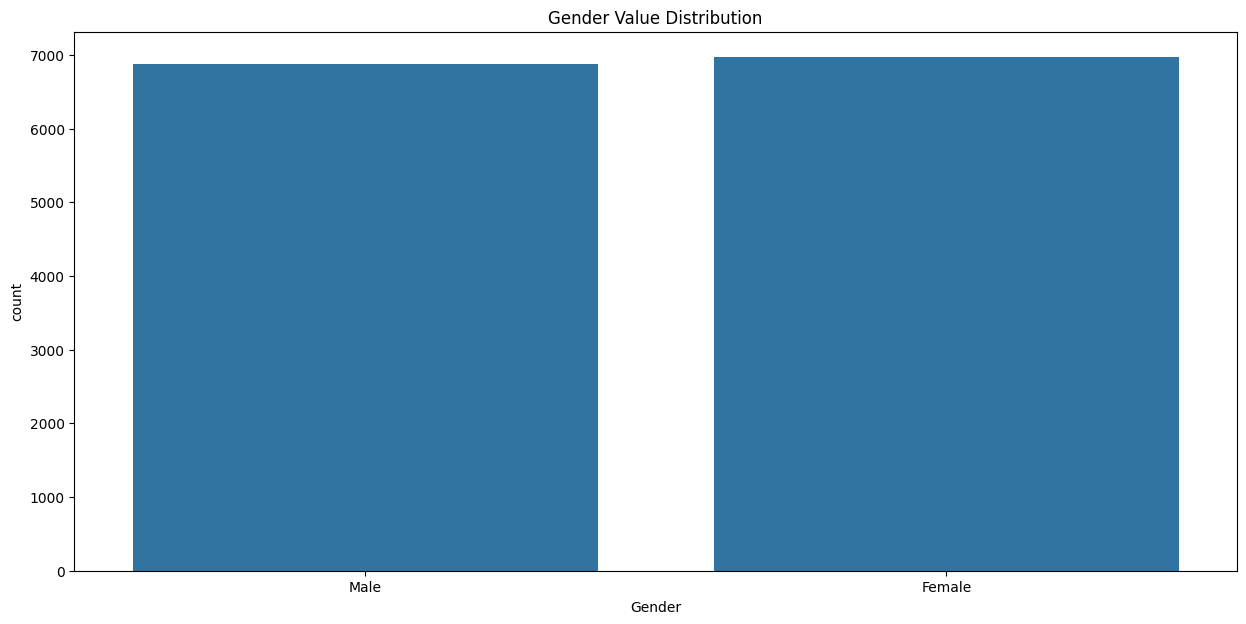

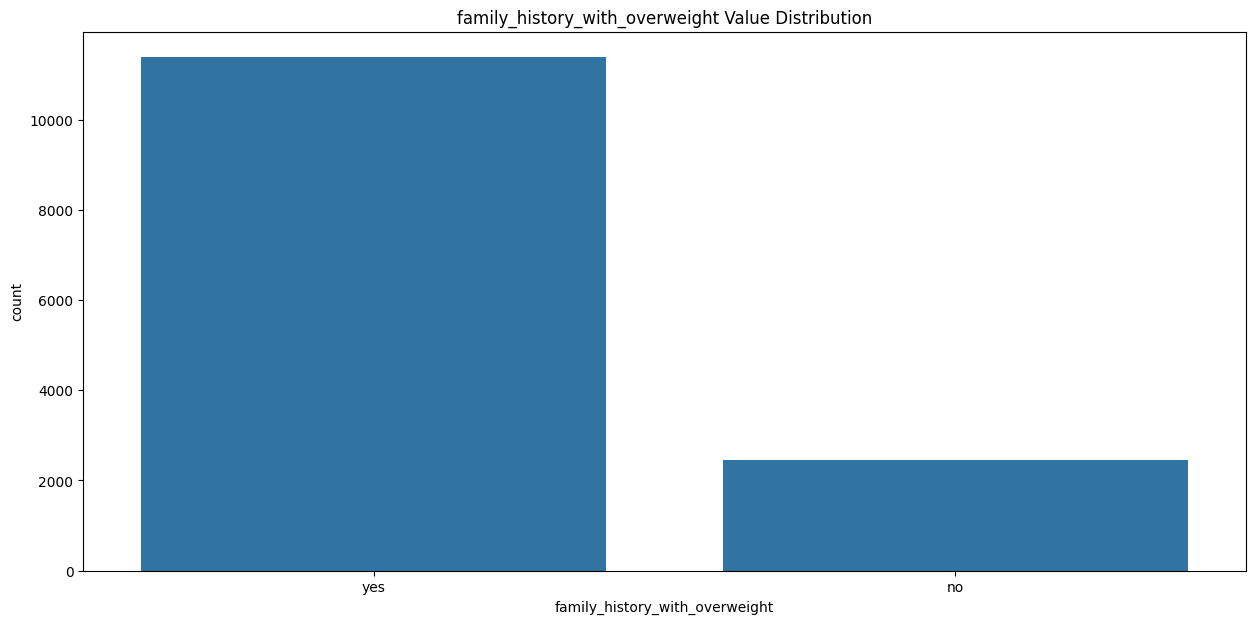

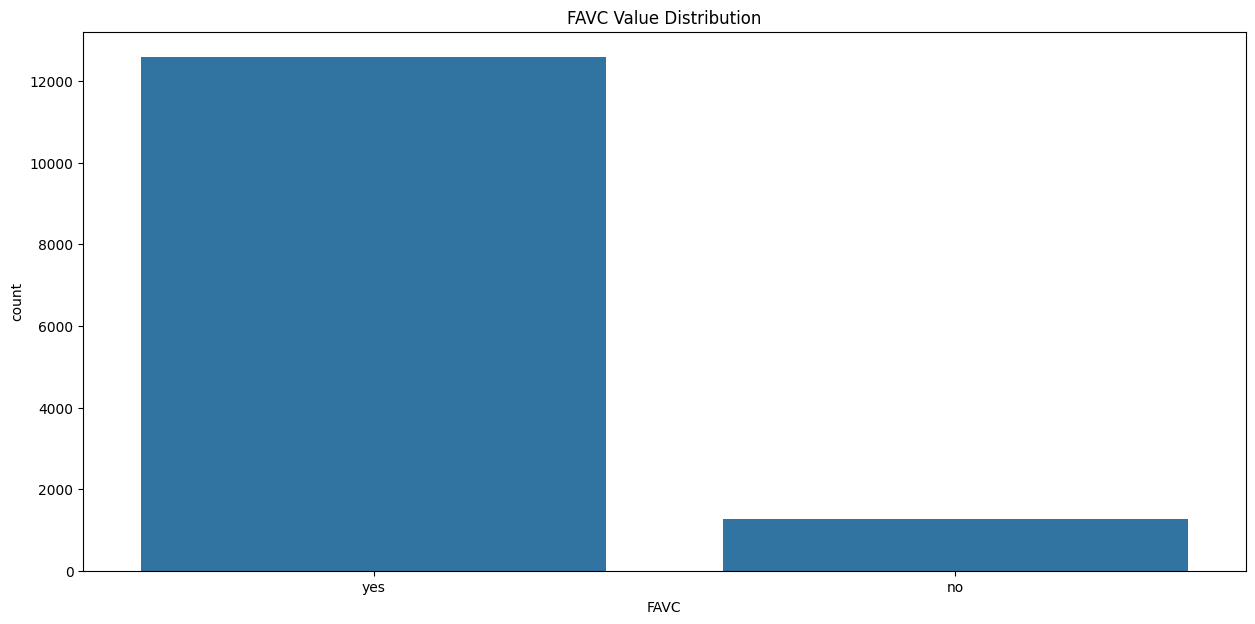

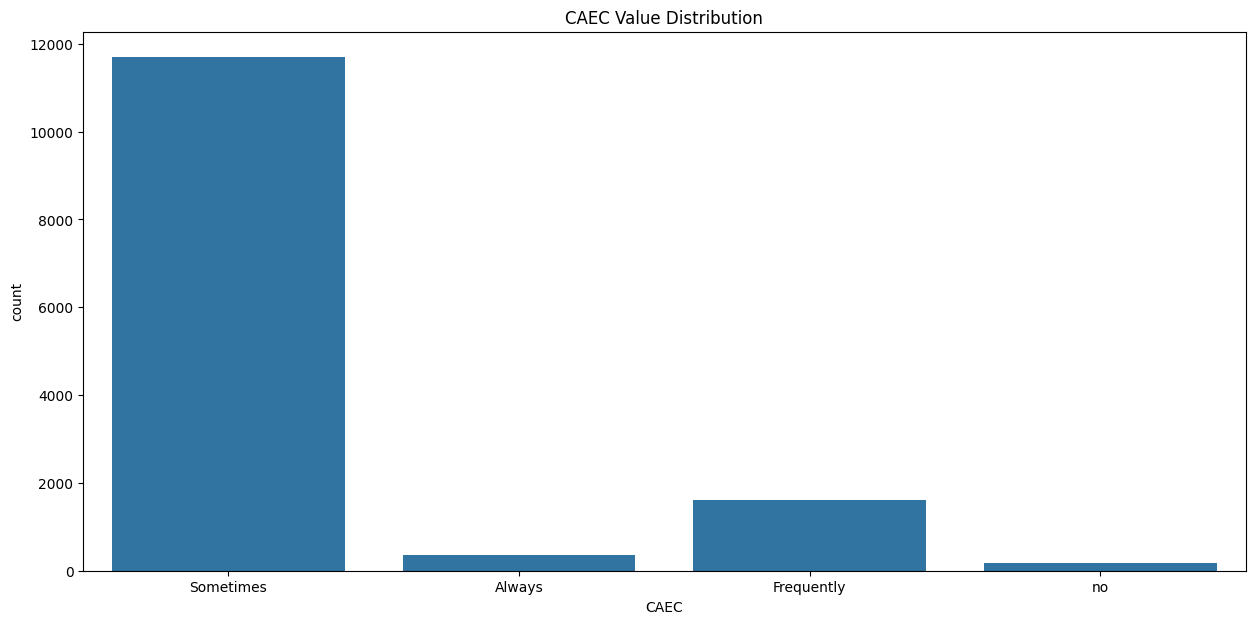

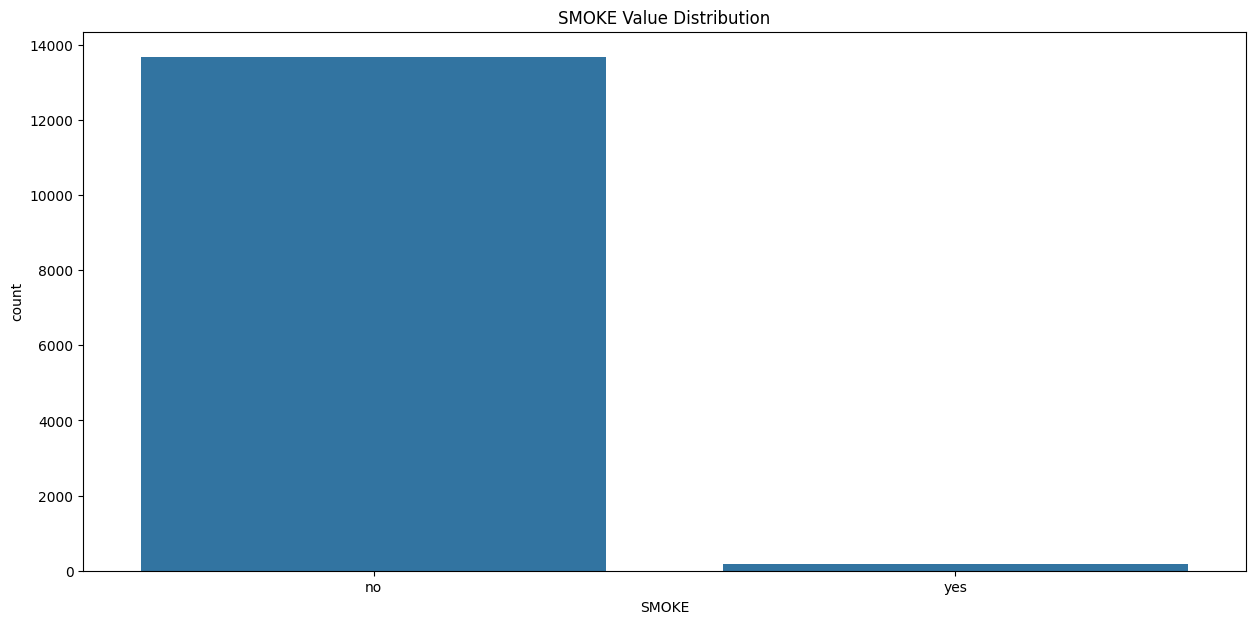

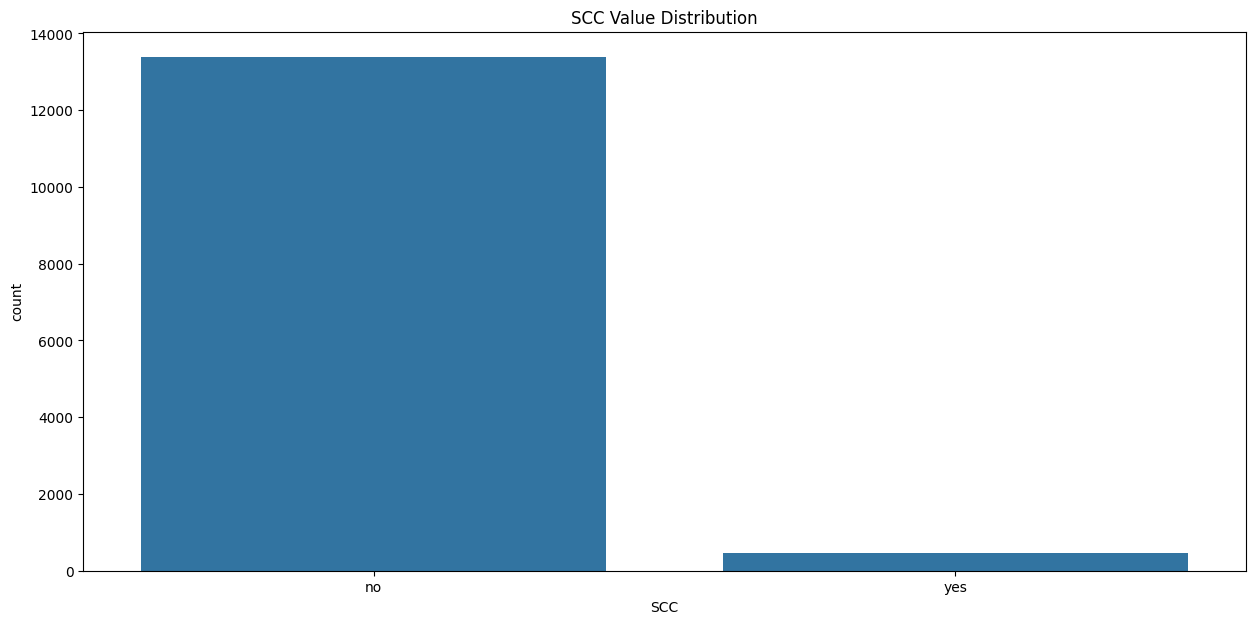

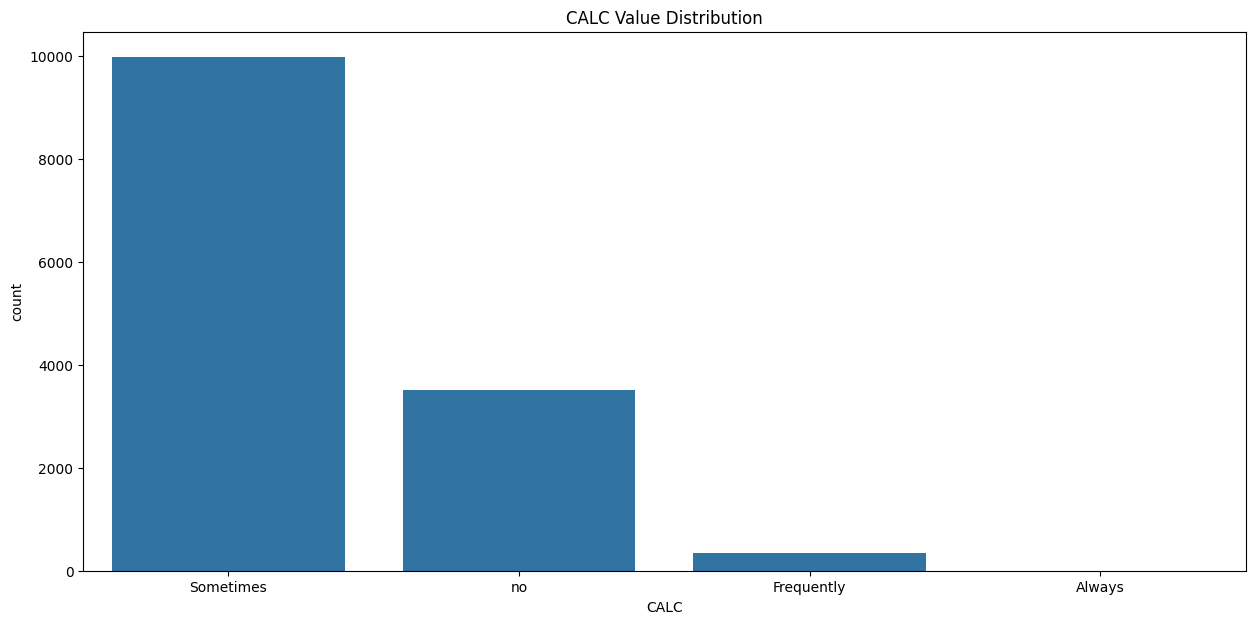

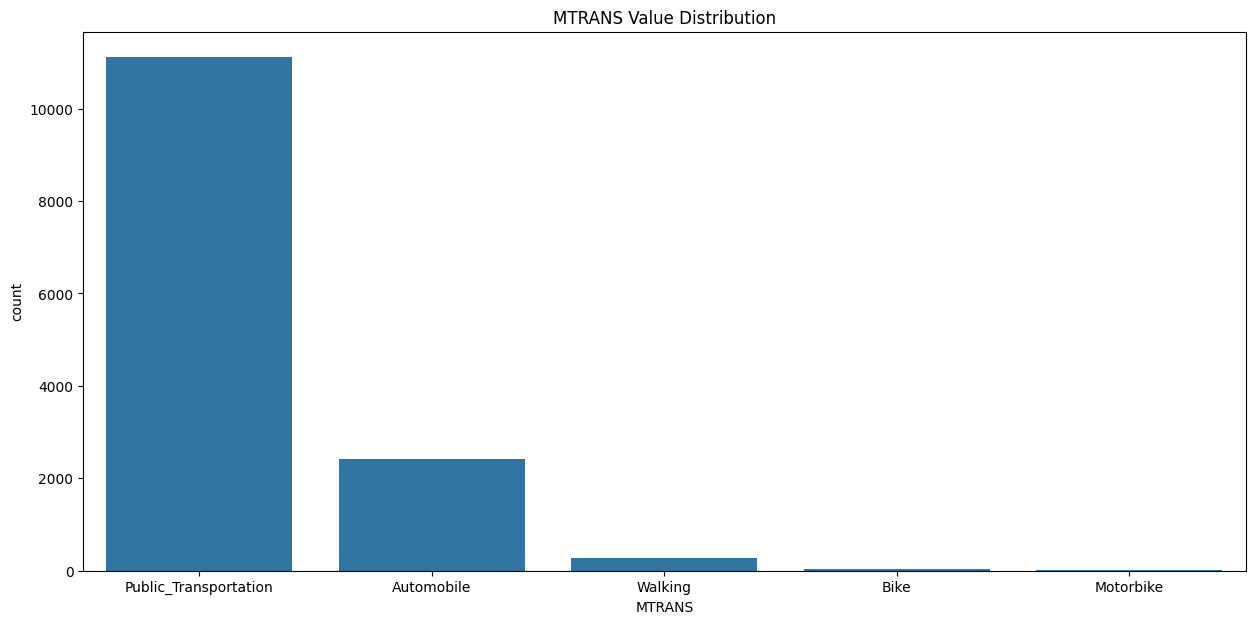

In [10]:
for col in cat_cols:
    plt.figure(figsize=[15,7])
    sns.countplot(df,x=df[col]).set(title= col+' Value Distribution')
    plt.show()

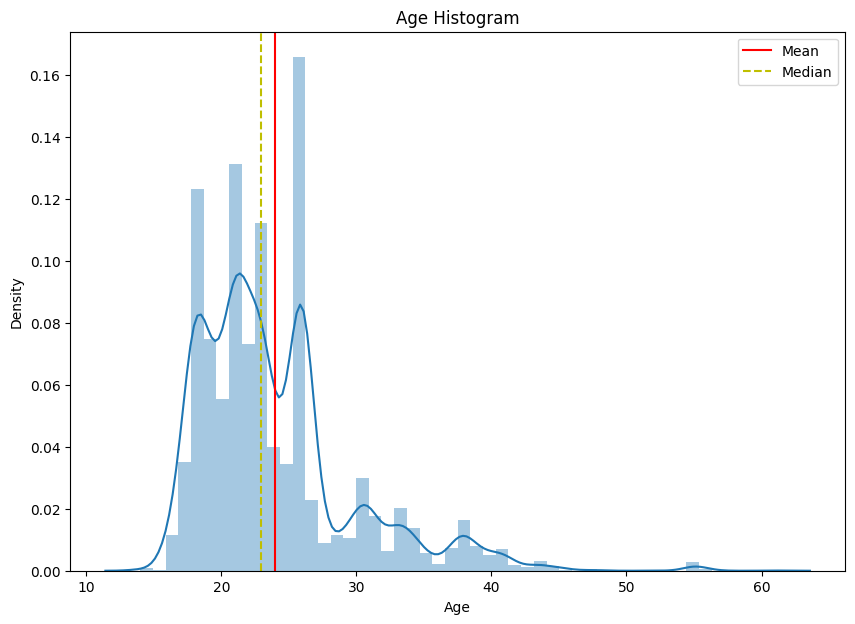

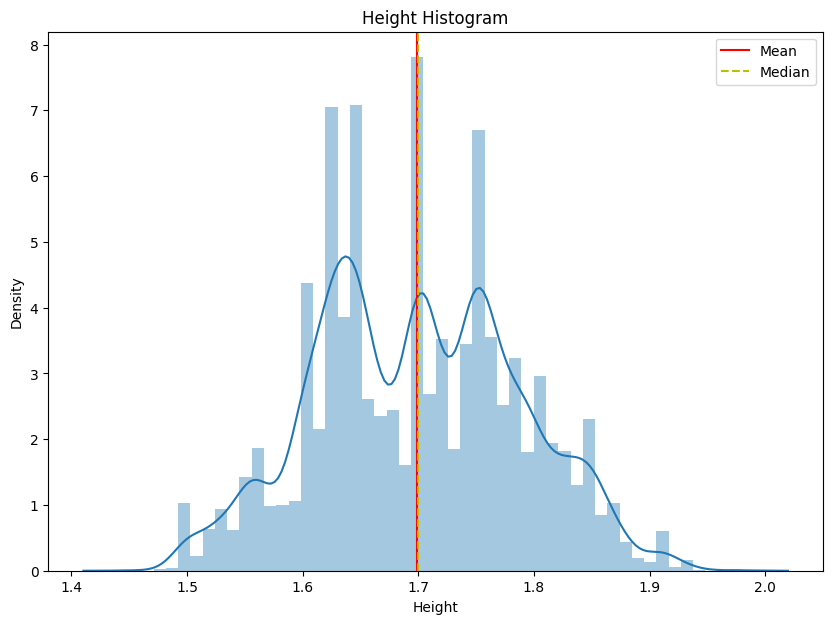

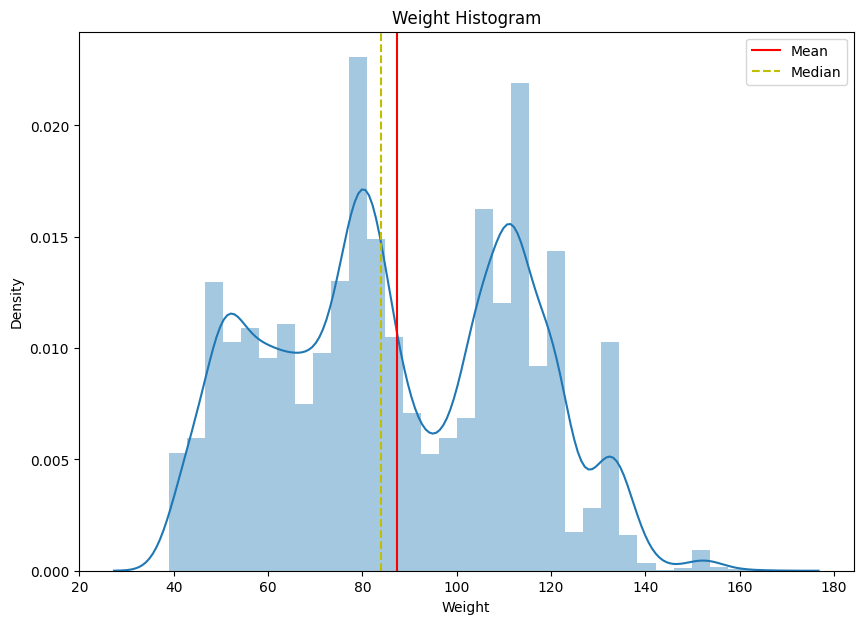

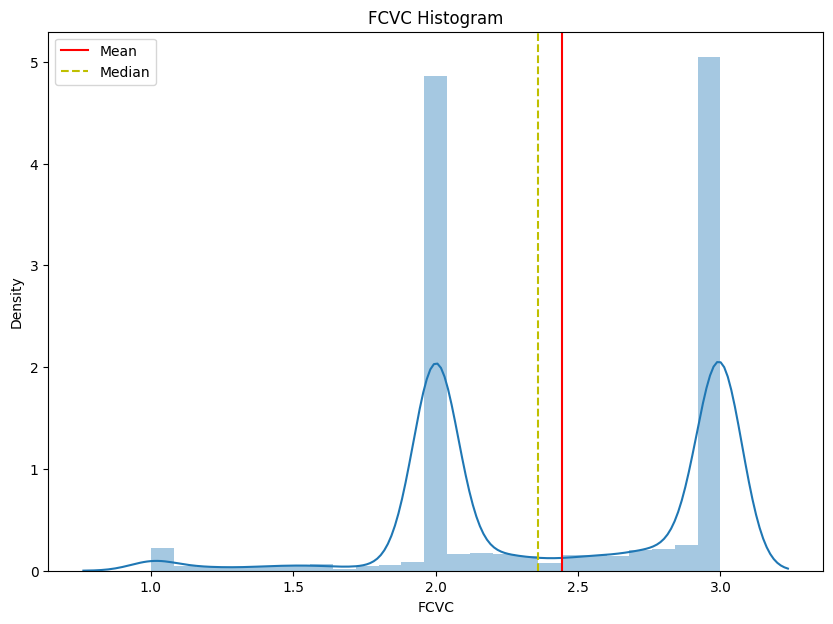

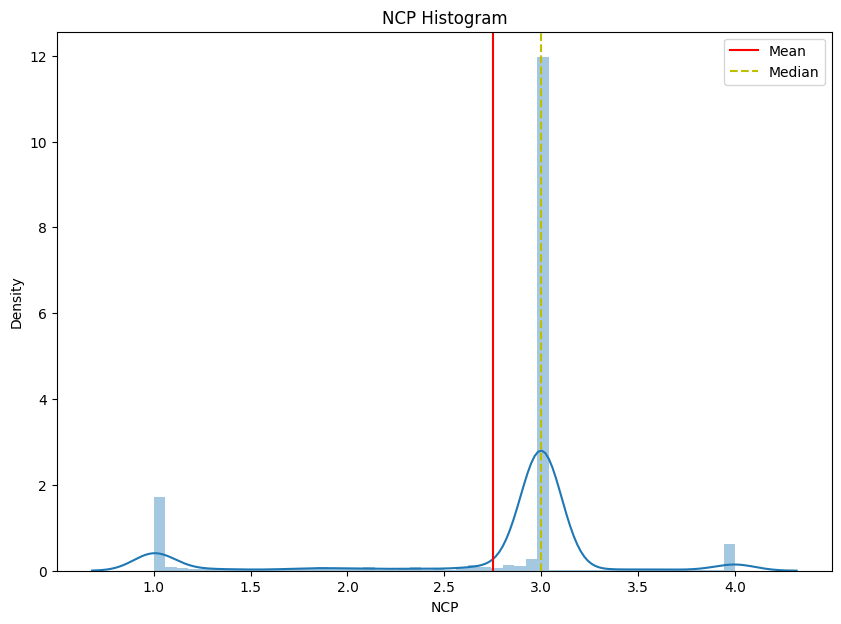

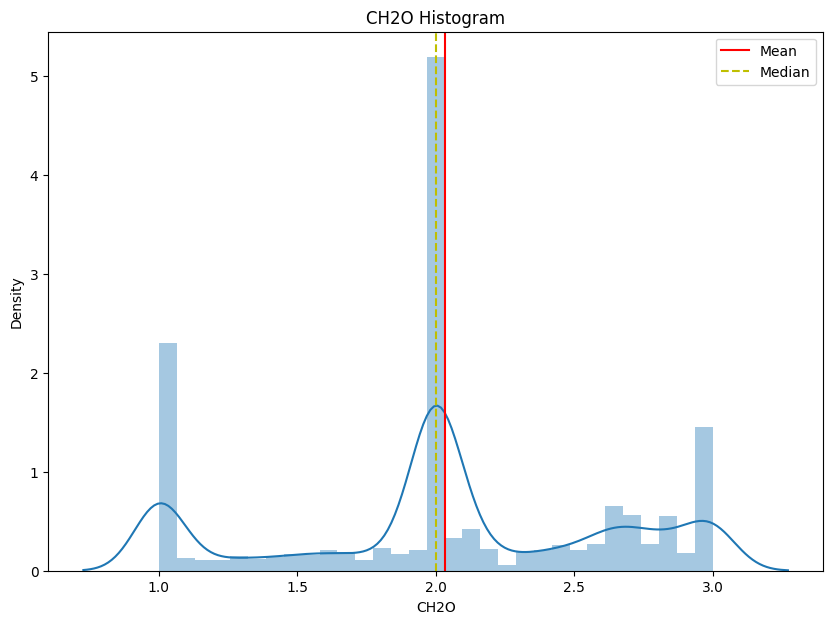

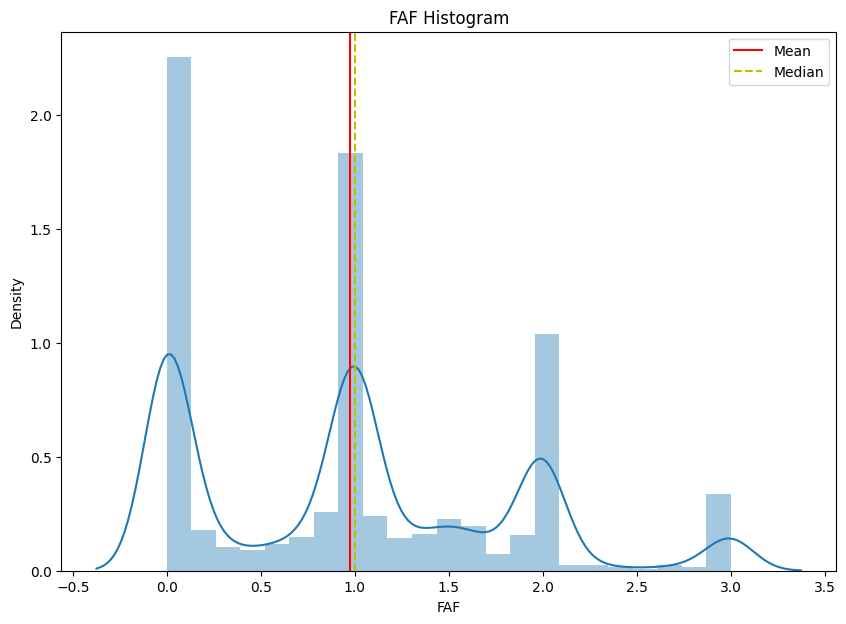

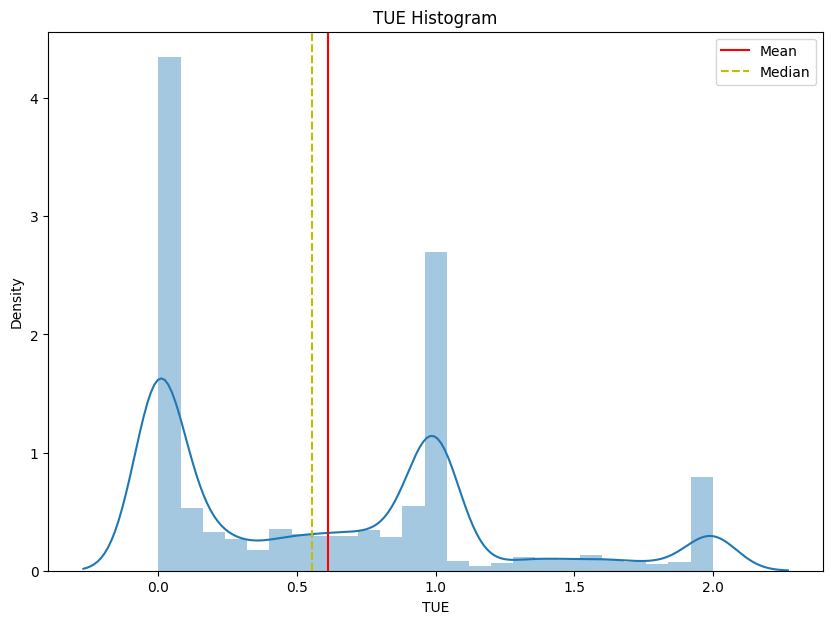

In [11]:
for col in num_cols:
    plt.figure(figsize=[10,7])
    sns.distplot(df[col],kde=True).set(title= col+' Histogram')
    plt.axvline(df[col].mean(),color='r', label='Mean')
    plt.axvline(df[col].median(),color='y', linestyle='--',label='Median')
    plt.legend()
    plt.show()

In [13]:
import plotly.express as px

# Ensure that 'NObeyesdad' is a column in your DataFrame
if 'NObeyesdad' in df.columns:
    fig = px.sunburst(
        df,
        path=['NObeyesdad', 'Gender', 'MTRANS', 'family_history_with_overweight', 'SMOKE'],
        color='Gender',
        color_discrete_map={'Male': 'gold', 'Female': 'darkblue'},
        width=1200, height=1200
    )
    fig.show()
else:
    print("Column 'NObeyesdad' does not exist in the DataFrame. Please check the column names.")


Column 'NObeyesdad' does not exist in the DataFrame. Please check the column names.


In [15]:
df.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS'],
      dtype='object')

In [16]:
df['BMI']=df['Weight']/df['Height']
test['BMI']=test['Weight']/test['Height']

In [35]:
train_df=df.drop(columns='id')
test_df=test.drop(columns='id')

train_df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS'],
      dtype='object')

In [36]:
cat_cols.head()


,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS
0,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation
1,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation
2,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation
3,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation
4,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation


In [37]:
train_df=pd.get_dummies(train_df,columns=['Gender','family_history_with_overweight','SMOKE','MTRANS','SCC','FAVC','CAEC'],dtype=int)
test_df=pd.get_dummies(test_df,columns=['Gender','family_history_with_overweight','SMOKE','MTRANS','SCC','FAVC','CAEC'],dtype=int)

In [38]:
test_df


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,CALC,NObeyesdad,...,MTRANS_Public_Transportation,MTRANS_Walking,SCC_no,SCC_yes,FAVC_no,FAVC_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no
0,24.443011,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473,Sometimes,Overweight_Level_II,...,1,0,1,0,0,1,0,0,1,0
1,18.000000,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000,no,Normal_Weight,...,0,0,1,0,0,1,0,1,0,0
2,18.000000,1.711460,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584,no,Insufficient_Weight,...,1,0,1,0,0,1,0,0,1,0
3,20.952737,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199,Sometimes,Obesity_Type_III,...,1,0,1,0,0,1,0,0,1,0
4,31.641081,1.914186,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721,Sometimes,Overweight_Level_II,...,1,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,25.137087,1.766626,114.187096,2.919584,3.000000,2.151809,1.330519,0.196680,Sometimes,Obesity_Type_II,...,1,0,1,0,0,1,0,0,1,0
20754,18.000000,1.710000,50.000000,3.000000,4.000000,1.000000,2.000000,1.000000,Sometimes,Insufficient_Weight,...,1,0,1,0,0,1,0,1,0,0
20755,20.101026,1.819557,105.580491,2.407817,3.000000,2.000000,1.158040,1.198439,no,Obesity_Type_II,...,1,0,1,0,0,1,0,0,1,0
20756,33.852953,1.700000,83.520113,2.671238,1.971472,2.144838,0.000000,0.973834,no,Overweight_Level_II,...,0,0,1,0,0,1,0,0,1,0


In [39]:
test['CALC'].unique()


array(['Sometimes', 'no', 'Frequently'], dtype=object)

In [40]:
train_df.columns


Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'CALC',
       'Gender_Female', 'Gender_Male', 'family_history_with_overweight_no',
       'family_history_with_overweight_yes', 'SMOKE_no', 'SMOKE_yes',
       'MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Motorbike',
       'MTRANS_Public_Transportation', 'MTRANS_Walking', 'SCC_no', 'SCC_yes',
       'FAVC_no', 'FAVC_yes', 'CAEC_Always', 'CAEC_Frequently',
       'CAEC_Sometimes', 'CAEC_no'],
      dtype='object')

In [41]:
test_df.columns


Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'CALC',
       'NObeyesdad', 'Gender_Female', 'Gender_Male',
       'family_history_with_overweight_no',
       'family_history_with_overweight_yes', 'SMOKE_no', 'SMOKE_yes',
       'MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Motorbike',
       'MTRANS_Public_Transportation', 'MTRANS_Walking', 'SCC_no', 'SCC_yes',
       'FAVC_no', 'FAVC_yes', 'CAEC_Always', 'CAEC_Frequently',
       'CAEC_Sometimes', 'CAEC_no'],
      dtype='object')

In [43]:
num_cols.describe()


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000
mean,23.952740,1.698934,87.384504,2.442898,2.750610,2.032044,0.974532,0.611033
std,5.799814,0.088761,26.111819,0.531606,0.710927,0.611230,0.840361,0.608005
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.631662,65.000000,2.000000,3.000000,1.771781,0.001086,0.000000
50%,22.906342,1.700000,83.952968,2.358087,3.000000,2.000000,1.000000,0.552498
75%,26.000000,1.760710,111.157811,3.000000,3.000000,2.552388,1.571865,1.000000
max,61.000000,1.980000,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [44]:
num_cols.nunique()


Age       1539
Height    1739
Weight    1798
FCVC       828
NCP        649
CH2O      1366
FAF       1260
TUE       1172
dtype: int64

In [45]:
n=5 # Number of CLusters
for col in num_cols:
    col_name=col+'_bin'
    #train_df[col_name]=cluster(train_df[[col]],n)
    #test_df[col_name]=cluster(test_df[[col]],n)

train_df.head(20)


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,CALC,Gender_Female,...,MTRANS_Public_Transportation,MTRANS_Walking,SCC_no,SCC_yes,FAVC_no,FAVC_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no
0,26.899886,1.848294,120.644178,2.938616,3.000000,2.825629,0.855400,0.000000,Sometimes,0,...,1,0,1,0,0,1,0,0,1,0
1,21.000000,1.600000,66.000000,2.000000,1.000000,3.000000,1.000000,0.000000,Sometimes,1,...,1,0,1,0,0,1,0,0,1,0
2,26.000000,1.643355,111.600553,3.000000,3.000000,2.621877,0.000000,0.250502,Sometimes,1,...,1,0,1,0,0,1,0,0,1,0
3,20.979254,1.553127,103.669116,2.000000,2.977909,2.786417,0.094851,0.000000,Sometimes,0,...,1,0,1,0,0,1,0,0,1,0
4,26.000000,1.627396,104.835346,3.000000,3.000000,2.653531,0.000000,0.741069,Sometimes,1,...,1,0,1,0,0,1,0,0,1,0
5,19.799054,1.844751,59.605028,2.000000,4.000000,2.722063,2.000000,1.283673,no,0,...,0,0,1,0,0,1,0,0,1,0
6,18.000000,1.728834,51.442293,1.202075,3.000000,1.087166,0.788585,1.000000,Sometimes,0,...,1,0,1,0,0,1,0,0,1,0
7,20.000000,1.810000,80.000000,2.000000,3.000000,2.000000,3.000000,0.000000,no,0,...,0,0,1,0,0,1,1,0,0,0
8,21.000000,1.700000,80.000000,2.000000,3.000000,2.000000,0.000000,2.000000,no,0,...,1,0,1,0,0,1,0,1,0,0
9,21.000000,1.560000,53.000000,2.000000,3.000000,2.000000,0.000000,1.000000,Sometimes,1,...,1,0,1,0,0,1,0,0,1,0


In [46]:
train_df.nunique()


Age                                   1539
Height                                1739
Weight                                1798
FCVC                                   828
NCP                                    649
CH2O                                  1366
FAF                                   1260
TUE                                   1172
CALC                                     4
Gender_Female                            2
Gender_Male                              2
family_history_with_overweight_no        2
family_history_with_overweight_yes       2
SMOKE_no                                 2
SMOKE_yes                                2
MTRANS_Automobile                        2
MTRANS_Bike                              2
MTRANS_Motorbike                         2
MTRANS_Public_Transportation             2
MTRANS_Walking                           2
SCC_no                                   2
SCC_yes                                  2
FAVC_no                                  2
FAVC_yes   

In [47]:
def scale(X):
    from sklearn import preprocessing
    scaled=preprocessing.StandardScaler()
    scaler=scaled.fit(X)
    X=scaler.transform(X)
    return X

In [50]:
def evaluate(y_test,ypred):
    from sklearn.metrics import precision_score
    from sklearn.metrics import recall_score
    from sklearn.metrics import f1_score
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import confusion_matrix
    print("Accuracy: ",accuracy_score(y_test,y_pred))
    print("Recall Score: ", recall_score(y_test,y_pred, average='macro')) #Recall measures the proportion of true positive predictions among all actual positive instalnces. If we predicted 100 survived correctly whereas actually 100 survived out of which 67 predicted correctly so recall will be 0.67
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 10))
    s=sns.heatmap(cm,annot=True, cmap='Reds')